#Song Popularity and Music Metrics

Data on music popularity and metrics is extracted from Spotify and a subset of the Million Song Dataset. The data is then transformed and loaded into an AWS SQL relational database where it may be used to identify musical trends quantitatively.

In [ ]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 9.4 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_client_id = passwords.client_id
spotify_client_secret  = passwords.client_secret

client_credentials_manager = SpotifyClientCredentials(
    client_id = spotify_client_id,
    client_secret = spotify_client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

# Extract and Transform

##Metrics
A subset of data from the Million Song Dataset was downloaded and imported into a Google Sheets document. The data will be extracted from the Google Sheets file and organized in a Pandas dataframe. The data will be checked for NaN values and filtered, unnecessary columns will be dropped and remaining columns will be renamed.

In [ ]:
metrics = pd.read_csv("https://docs.google.com/spreadsheets/d/1Hsy-HNgQfQUEbQOTnK9s1WcBILg39QTW2DEPWqoOuIM/gviz/tq?tqx=out:csv")

In [ ]:
metrics.shape # Checks the number of rows and columns

(10000, 35)

In [ ]:
metrics.head()  # Checks the first five rows of metrics

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,...,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


The column artist_mbtags has many NaN values, however that column is unnecessary for the desired relation. This column will need to be removed.

In [ ]:
metrics.dtypes  # Checks data types

,0
artist.hotttnesss,float64
artist.id,object
artist.name,object
artist_mbtags,object
artist_mbtags_count,float64
bars_confidence,float64
bars_start,float64
beats_confidence,float64
beats_start,float64
duration,float64


All data types are correct so no type conversions are necessary. The object type in Pandas is equivalent to the string type in Python.

In [ ]:
metrics.isna().sum()  # Checks for NaN values

,0
artist.hotttnesss,0
artist.id,0
artist.name,0
artist_mbtags,6289
artist_mbtags_count,0
bars_confidence,2
bars_start,2
beats_confidence,0
beats_start,0
duration,0


The artist_mbtags and song.hotttnesss columns have the most NaN values. However, the artist_mbtags column is unnecessary and only the hottest songs are of interest so filtering by song.hotttnesss will eliminate all NaN values in that column.

In [ ]:
metrics = metrics[metrics['song.hotttnesss'] > 0.5]  # Filters for hottest songs

In [ ]:
metrics.drop_duplicates(subset=['title'], keep='first', inplace=True)  # Drops duplicate songs

<ipython-input-10-edaad1b632d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics.drop_duplicates(subset=['title'], keep='first', inplace=True)  # Drops duplicate songs


In [ ]:
metrics.shape

(1699, 35)

In [ ]:
# Removes redundant and unnecessary columns
metrics = metrics[['artist.hotttnesss', 'beats_start', 'end_of_fade_in', 'familiarity', 'key', 'location', 'loudness', 'mode', 'song.hotttnesss', 'start_of_fade_out', 'tatums_start', 'tempo', 'terms', 'time_signature', 'title', 'year']]
metrics.head()

,artist.hotttnesss,beats_start,end_of_fade_in,familiarity,key,location,loudness,mode,song.hotttnesss,start_of_fade_out,tatums_start,tempo,terms,time_signature,title,year
0,0.401998,0.58521,0.247,0.581794,1.0,California - LA,-11.197,0,0.602120,218.932,0.28519,92.198,hip hop,4.0,I Didn't Mean To,0
4,0.401724,0.13576,0.066,0.651046,2.0,Not available,-4.501,1,0.604501,198.699,0.13576,129.738,pop punk,4.0,Face the Ashes,2007
18,0.513463,0.05728,0.145,0.707200,7.0,Not available,-5.271,1,0.684136,285.605,0.05728,150.062,hard rock,4.0,Caught In A Dream,2004
23,0.541889,0.33578,0.061,0.839963,7.0,"Morris Plains, NJ",-4.264,1,0.666528,204.696,0.15349,166.862,math-core,4.0,Setting Fire to Sleeping Giants,2004
36,0.488020,0.24380,0.467,0.809324,4.0,"San Antonio, TX",-9.063,0,0.593943,426.104,0.09307,130.586,noise rock,4.0,"Barking Dogs (From ""Piouhgd"")",0


In [ ]:
metrics.isna().sum()  # Checks for NaN values

,0
artist.hotttnesss,0
beats_start,0
end_of_fade_in,0
familiarity,0
key,0
location,0
loudness,0
mode,0
song.hotttnesss,0
start_of_fade_out,0


Filtering data and removing unnecessary columns removed all NaN values!



In [ ]:
# Renames columns for clarity
metrics.columns = ['artist_hotness', 'beats_start', 'fade_in', 'familiarity', 'key', 'location', 'loudness', 'mode', 'song_hotness', 'fade_out', 'tatums_start', 'tempo', 'genre', 'time_signature', 'name', 'year']
metrics.head()

,artist_hotness,beats_start,fade_in,familiarity,key,location,loudness,mode,song_hotness,fade_out,tatums_start,tempo,genre,time_signature,name,year
0,0.401998,0.58521,0.247,0.581794,1.0,California - LA,-11.197,0,0.602120,218.932,0.28519,92.198,hip hop,4.0,I Didn't Mean To,0
4,0.401724,0.13576,0.066,0.651046,2.0,Not available,-4.501,1,0.604501,198.699,0.13576,129.738,pop punk,4.0,Face the Ashes,2007
18,0.513463,0.05728,0.145,0.707200,7.0,Not available,-5.271,1,0.684136,285.605,0.05728,150.062,hard rock,4.0,Caught In A Dream,2004
23,0.541889,0.33578,0.061,0.839963,7.0,"Morris Plains, NJ",-4.264,1,0.666528,204.696,0.15349,166.862,math-core,4.0,Setting Fire to Sleeping Giants,2004
36,0.488020,0.24380,0.467,0.809324,4.0,"San Antonio, TX",-9.063,0,0.593943,426.104,0.09307,130.586,noise rock,4.0,"Barking Dogs (From ""Piouhgd"")",0


##Tracks
Individual track data for each song in metrics will be extracted from Spotify through the Spotify API using methods from the Spotipy package. These methods will first be used to explore information for a single track and then will be used to extract all data.

In [ ]:
track = sp.track('spotify:track:2qSkIjg1o9h3YT9RAgYN75') # Gets a single track
track

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74KM79TiuVKeVCqs8QtB0B'},
    'href': 'https://api.spotify.com/v1/artists/74KM79TiuVKeVCqs8QtB0B',
    'id': '74KM79TiuVKeVCqs8QtB0B',
    'name': 'Sabrina Carpenter',
    'type': 'artist',
    'uri': 'spotify:artist:74KM79TiuVKeVCqs8QtB0B'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
  

In [ ]:
track.keys()  # Gets keys of track

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [ ]:
# Gets track data and returns it in a list
def get_track_info(track_id):
  track_json = sp.track(track_id)
  album = track_json['album']['name']
  artist = track_json['artists'][0]['name']
  artist_id = track_json['artists'][0]['uri'].split(":")[-1]
  duration = track_json['duration_ms']
  explicit = track_json['explicit']
  id = track_json['id']
  name = track_json['name']
  popularity = track_json['popularity']
  track_list = [album, artist, artist_id, duration, explicit, id, name, popularity]
  return track_list

In [ ]:
track_list = get_track_info('spotify:track:2qSkIjg1o9h3YT9RAgYN75')  # Tests it on a single track
track_list

['Espresso',
 'Sabrina Carpenter',
 '74KM79TiuVKeVCqs8QtB0B',
 175459,
 True,
 '2qSkIjg1o9h3YT9RAgYN75',
 'Espresso',
 89]

In [ ]:
# Puts track into a dataframe
track_info = pd.DataFrame(data = [track_list], columns = ['album', 'artist', 'artist_id', 'duration', 'explicit', 'id', 'name', 'popularity'])
track_info

,album,artist,artist_id,duration,explicit,id,name,popularity
0,Espresso,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,175459,True,2qSkIjg1o9h3YT9RAgYN75,Espresso,89


The Spotify API doesn't currently support queries that get the tracks with the highest popularity. Therefore, Spotify track data for each song must be queried for one at a time using individual song names from the metrics dataframe. Spotify has a query rate limit, so a half second delay is implemented for every hundred queries.



In [ ]:
# Gets URIs of songs in metrics dataframe
# Cell should take approximately 3 minutes to run
name_uri = {}  # Keeps track of names
uri_list = []
count = 0
for value in metrics['name'].values:
  results = sp.search(q=f'track:{value}', type='track', limit=1)
  if results['tracks']['items']:
    uri = results['tracks']['items'][0]['uri'].split(":")[-1]
    if uri not in uri_list:
      uri_list.append(uri)
      name_uri[value] = uri
  if count % 100 == 0:  # Delays every hundred queries
    time.sleep(0.5)
  count += 1
uri_list

['7EejjSh1WDrm81z0u3Fhmk',
 '7EOzmYcnycAj1rbGb63cGT',
 '2aahxM4jGWFWgMzmHpelAR',
 '2ZyNYdziwt0ZS9mxRiwnXM',
 '5C1dZf6gFgBo7m4SgQznjx',
 '7mUG5LiaGuuAA45LGqqXNc',
 '2bGhSMe3u2qwSgETq0Kab3',
 '381viPERA0npU6au0pTKTZ',
 '2gciS7UJjv59l7608DFGNl',
 '6QQvbuTj01JpaESjxm5kMY',
 '3L2vZkWxlGn9Ix3ahwozGF',
 '46mov5j25a6BXrxNQKUwiA',
 '4hfIVhq0F0zFUcrbecsYmo',
 '3UULkHdmLDqBDPmBYltoRE',
 '2umdwsJRuFHBRw8TCQmYbq',
 '1fiF0kitjNoAM4xov6wGaK',
 '6AUxUEdwGIBjnUaifqYOHe',
 '3uRytee5BNgbkgsOnBoRNI',
 '6A2fGSY2uZcidWpNosshqc',
 '04mAOoQNsXmDJlyupJwmkO',
 '0kqzfTSXxjPkO6XuM8slR4',
 '0qRdgnlC72vp54bUzoXDmq',
 '73XSeP4sfxvHBl7eNsOHtj',
 '7xrgOpWIKwvvdoEb8ojGsa',
 '7Bgvr1YM8PVuLuq7ijrlsZ',
 '3lzUeaCbcCDB5IXYfqWRlF',
 '2sLwPnIP3CUVmIuHranJZU',
 '6ZJQ8lOeIgyMAGd8vb48wH',
 '1N32F6e5IboU0x9ynKb0M7',
 '22seP38foydqUMp5Fvkcjm',
 '6SpS3512xzHKapz4plRuZW',
 '1cDQku650Uev3TnRGdlbE5',
 '3SzAghJfbmcEIMmLRJ2Wzd',
 '4FJgXJ1pSJ6JHrdoMc7hEV',
 '5LMtYvBkdln0xFr6YntzAl',
 '5o5akY9xnEk6lpMkD8RwD9',
 '3opC4kS9RpbNJw7aORFmGF',
 

The Spotify API uses FuzzyWuzzy for searches, so song names aren't an exact match. Therefore, song names cannot be used to join the metrics and Spotify tracks dataframes. The name_uri dictionary keeps track of the names in the metrics dataframe and the corresponding URIs. URIs will be the primary key of both dataframes.

In [ ]:
# Creates a dataframe relating names to URIs
metrics_uri = pd.DataFrame(data = list(name_uri.items()), columns = ['name', 'uri'])
metrics_uri.head()

,name,uri
0,I Didn't Mean To,7EejjSh1WDrm81z0u3Fhmk
1,Face the Ashes,7EOzmYcnycAj1rbGb63cGT
2,Caught In A Dream,2aahxM4jGWFWgMzmHpelAR
3,Setting Fire to Sleeping Giants,2ZyNYdziwt0ZS9mxRiwnXM
4,Burning In The Aftermath,5C1dZf6gFgBo7m4SgQznjx


In [ ]:
metrics = pd.merge(metrics_uri, metrics, on='name', how='inner')
metrics.head()

,name,uri,artist_hotness,beats_start,fade_in,familiarity,key,location,loudness,mode,song_hotness,fade_out,tatums_start,tempo,genre,time_signature,year
0,I Didn't Mean To,7EejjSh1WDrm81z0u3Fhmk,0.401998,0.58521,0.247,0.581794,1.0,California - LA,-11.197,0,0.602120,218.932,0.28519,92.198,hip hop,4.0,0
1,Face the Ashes,7EOzmYcnycAj1rbGb63cGT,0.401724,0.13576,0.066,0.651046,2.0,Not available,-4.501,1,0.604501,198.699,0.13576,129.738,pop punk,4.0,2007
2,Caught In A Dream,2aahxM4jGWFWgMzmHpelAR,0.513463,0.05728,0.145,0.707200,7.0,Not available,-5.271,1,0.684136,285.605,0.05728,150.062,hard rock,4.0,2004
3,Setting Fire to Sleeping Giants,2ZyNYdziwt0ZS9mxRiwnXM,0.541889,0.33578,0.061,0.839963,7.0,"Morris Plains, NJ",-4.264,1,0.666528,204.696,0.15349,166.862,math-core,4.0,2004
4,Burning In The Aftermath,5C1dZf6gFgBo7m4SgQznjx,0.467538,0.38075,0.000,0.668675,2.0,"Detroit, MI",-2.022,1,0.528782,87.806,0.12215,115.887,ska punk,4.0,2003


In [ ]:
metrics.shape

(1469, 17)

In [ ]:
len(uri_list)  # Checks number of URIs in list

1469

Of the 1,699 songs in metrics, 230 songs were not found on Spotify.

In [ ]:
track_info = map(get_track_info, uri_list)
track_info

In [ ]:
# Cell should take approximately 3 minutes to run
track_info = list(track_info)
track_info

[['Fragile',
  'Cherrelle',
  '4R2ZUCVWjJs5ef9pjnCVC4',
  423000,
  False,
  '7EejjSh1WDrm81z0u3Fhmk',
  "I Didn't Mean To Turn You On",
  43],
 ['Day One (Deluxe)',
  'From Ashes to New',
  '4HrkLxQHZ5mgCtIVpiH5QX',
  183912,
  False,
  '7EOzmYcnycAj1rbGb63cGT',
  'Face the Day',
  26],
 ['Caught in a Dream',
  'PALASTIC',
  '6OFZSmtxDquMkX2XZJSN6y',
  165500,
  False,
  '2aahxM4jGWFWgMzmHpelAR',
  'Caught in a Dream',
  64],
 ['Miss Machine',
  'The Dillinger Escape Plan',
  '7IGcjaMGAtsvKBLQX26W4i',
  207773,
  False,
  '2ZyNYdziwt0ZS9mxRiwnXM',
  'Setting Fire to Sleeping Giants',
  38],
 ['A Match & Some Gasoline',
  'The Suicide Machines',
  '31v7ijnAMVL9V7Uzr1sFcI',
  95853,
  False,
  '5C1dZf6gFgBo7m4SgQznjx',
  'Burning In The Aftermath',
  17],
 ['Locust Abortion Technician',
  'Butthole Surfers',
  '62BcWP4fzR8axESibNQEhs',
  231946,
  False,
  '7mUG5LiaGuuAA45LGqqXNc',
  'Human Cannonball',
  35],
 ['Etiquette',
  'Casiotone For The Painfully Alone',
  '4FdSsjcX7vzOnN5zNqQW

In [ ]:
tracks = pd.DataFrame(data = track_info, columns = ['album', 'artist', 'artist_id', 'duration', 'explicit', 'id', 'name', 'popularity'])
tracks.head()

,album,artist,artist_id,duration,explicit,id,name,popularity
0,Fragile,Cherrelle,4R2ZUCVWjJs5ef9pjnCVC4,423000,False,7EejjSh1WDrm81z0u3Fhmk,I Didn't Mean To Turn You On,43
1,Day One (Deluxe),From Ashes to New,4HrkLxQHZ5mgCtIVpiH5QX,183912,False,7EOzmYcnycAj1rbGb63cGT,Face the Day,26
2,Caught in a Dream,PALASTIC,6OFZSmtxDquMkX2XZJSN6y,165500,False,2aahxM4jGWFWgMzmHpelAR,Caught in a Dream,64
3,Miss Machine,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,207773,False,2ZyNYdziwt0ZS9mxRiwnXM,Setting Fire to Sleeping Giants,38
4,A Match & Some Gasoline,The Suicide Machines,31v7ijnAMVL9V7Uzr1sFcI,95853,False,5C1dZf6gFgBo7m4SgQznjx,Burning In The Aftermath,17


In [ ]:
tracks.shape

(1469, 8)

In [ ]:
tracks.isna().sum()  # Checks for NaN values

,0
album,0
artist,0
artist_id,0
duration,0
explicit,0
id,0
name,0
popularity,0


There are no NaN values in the tracks dataframe.

In [ ]:
# Renames columns
tracks.columns = ['album', 'artist', 'artist_id', 'duration', 'explicit', 'song_id', 'name', 'popularity']
tracks.head()

,album,artist,artist_id,duration,explicit,song_id,name,popularity
0,Fragile,Cherrelle,4R2ZUCVWjJs5ef9pjnCVC4,423000,False,7EejjSh1WDrm81z0u3Fhmk,I Didn't Mean To Turn You On,43
1,Day One (Deluxe),From Ashes to New,4HrkLxQHZ5mgCtIVpiH5QX,183912,False,7EOzmYcnycAj1rbGb63cGT,Face the Day,26
2,Caught in a Dream,PALASTIC,6OFZSmtxDquMkX2XZJSN6y,165500,False,2aahxM4jGWFWgMzmHpelAR,Caught in a Dream,64
3,Miss Machine,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,207773,False,2ZyNYdziwt0ZS9mxRiwnXM,Setting Fire to Sleeping Giants,38
4,A Match & Some Gasoline,The Suicide Machines,31v7ijnAMVL9V7Uzr1sFcI,95853,False,5C1dZf6gFgBo7m4SgQznjx,Burning In The Aftermath,17


In [ ]:
tracks['duration'] = tracks['duration'] / 1000  # Duration changed to seconds to maintain consident with metrics
tracks.head()

,album,artist,artist_id,duration,explicit,song_id,name,popularity
0,Fragile,Cherrelle,4R2ZUCVWjJs5ef9pjnCVC4,423.000,False,7EejjSh1WDrm81z0u3Fhmk,I Didn't Mean To Turn You On,43
1,Day One (Deluxe),From Ashes to New,4HrkLxQHZ5mgCtIVpiH5QX,183.912,False,7EOzmYcnycAj1rbGb63cGT,Face the Day,26
2,Caught in a Dream,PALASTIC,6OFZSmtxDquMkX2XZJSN6y,165.500,False,2aahxM4jGWFWgMzmHpelAR,Caught in a Dream,64
3,Miss Machine,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,207.773,False,2ZyNYdziwt0ZS9mxRiwnXM,Setting Fire to Sleeping Giants,38
4,A Match & Some Gasoline,The Suicide Machines,31v7ijnAMVL9V7Uzr1sFcI,95.853,False,5C1dZf6gFgBo7m4SgQznjx,Burning In The Aftermath,17


In [ ]:
# Merges metrics and tracks on uri and song_id columns
songs = pd.merge(metrics, tracks, left_on='uri', right_on='song_id', how='inner')
songs.head()

,name_x,uri,artist_hotness,beats_start,fade_in,familiarity,key,location,loudness,mode,...,time_signature,year,album,artist,artist_id,duration,explicit,song_id,name_y,popularity
0,I Didn't Mean To,7EejjSh1WDrm81z0u3Fhmk,0.401998,0.58521,0.247,0.581794,1.0,California - LA,-11.197,0,...,4.0,0,Fragile,Cherrelle,4R2ZUCVWjJs5ef9pjnCVC4,423.000,False,7EejjSh1WDrm81z0u3Fhmk,I Didn't Mean To Turn You On,43
1,Face the Ashes,7EOzmYcnycAj1rbGb63cGT,0.401724,0.13576,0.066,0.651046,2.0,Not available,-4.501,1,...,4.0,2007,Day One (Deluxe),From Ashes to New,4HrkLxQHZ5mgCtIVpiH5QX,183.912,False,7EOzmYcnycAj1rbGb63cGT,Face the Day,26
2,Caught In A Dream,2aahxM4jGWFWgMzmHpelAR,0.513463,0.05728,0.145,0.707200,7.0,Not available,-5.271,1,...,4.0,2004,Caught in a Dream,PALASTIC,6OFZSmtxDquMkX2XZJSN6y,165.500,False,2aahxM4jGWFWgMzmHpelAR,Caught in a Dream,64
3,Setting Fire to Sleeping Giants,2ZyNYdziwt0ZS9mxRiwnXM,0.541889,0.33578,0.061,0.839963,7.0,"Morris Plains, NJ",-4.264,1,...,4.0,2004,Miss Machine,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,207.773,False,2ZyNYdziwt0ZS9mxRiwnXM,Setting Fire to Sleeping Giants,38
4,Burning In The Aftermath,5C1dZf6gFgBo7m4SgQznjx,0.467538,0.38075,0.000,0.668675,2.0,"Detroit, MI",-2.022,1,...,4.0,2003,A Match & Some Gasoline,The Suicide Machines,31v7ijnAMVL9V7Uzr1sFcI,95.853,False,5C1dZf6gFgBo7m4SgQznjx,Burning In The Aftermath,17


In [ ]:
songs.shape

(1469, 25)

In [ ]:
# Removes duplicate name column, keeps name from Spotify
songs = songs.drop(columns=['name_x', 'uri'])
songs = songs.rename(columns={'name_y': 'name'})

In [ ]:
# Creates a dataframe with song identifiers
identifiers = songs[['song_id', 'artist_id', 'name', 'album', 'genre', 'year', 'song_hotness', 'popularity']]
identifiers.head()

,song_id,artist_id,name,album,genre,year,song_hotness,popularity
0,7EejjSh1WDrm81z0u3Fhmk,4R2ZUCVWjJs5ef9pjnCVC4,I Didn't Mean To Turn You On,Fragile,hip hop,0,0.602120,43
1,7EOzmYcnycAj1rbGb63cGT,4HrkLxQHZ5mgCtIVpiH5QX,Face the Day,Day One (Deluxe),pop punk,2007,0.604501,26
2,2aahxM4jGWFWgMzmHpelAR,6OFZSmtxDquMkX2XZJSN6y,Caught in a Dream,Caught in a Dream,hard rock,2004,0.684136,64
3,2ZyNYdziwt0ZS9mxRiwnXM,7IGcjaMGAtsvKBLQX26W4i,Setting Fire to Sleeping Giants,Miss Machine,math-core,2004,0.666528,38
4,5C1dZf6gFgBo7m4SgQznjx,31v7ijnAMVL9V7Uzr1sFcI,Burning In The Aftermath,A Match & Some Gasoline,ska punk,2003,0.528782,17


In [ ]:
# Creates a dataframe with artist information
artists = songs[['artist', 'artist_id', 'artist_hotness', 'familiarity', 'location']]
artists = artists.drop_duplicates(subset=['artist_id'])
artists.columns = ['name', 'artist_id', 'artist_hotness', 'familiarity', 'location']
artists.head()

,name,artist_id,artist_hotness,familiarity,location
0,Cherrelle,4R2ZUCVWjJs5ef9pjnCVC4,0.401998,0.581794,California - LA
1,From Ashes to New,4HrkLxQHZ5mgCtIVpiH5QX,0.401724,0.651046,Not available
2,PALASTIC,6OFZSmtxDquMkX2XZJSN6y,0.513463,0.707200,Not available
3,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,0.541889,0.839963,"Morris Plains, NJ"
4,The Suicide Machines,31v7ijnAMVL9V7Uzr1sFcI,0.467538,0.668675,"Detroit, MI"


In [ ]:
# Creates a dataframe with song elements
elements = songs[['song_id', 'key', 'loudness', 'mode', 'tempo', 'time_signature', 'explicit']]
elements.head()

,song_id,key,loudness,mode,tempo,time_signature,explicit
0,7EejjSh1WDrm81z0u3Fhmk,1.0,-11.197,0,92.198,4.0,False
1,7EOzmYcnycAj1rbGb63cGT,2.0,-4.501,1,129.738,4.0,False
2,2aahxM4jGWFWgMzmHpelAR,7.0,-5.271,1,150.062,4.0,False
3,2ZyNYdziwt0ZS9mxRiwnXM,7.0,-4.264,1,166.862,4.0,False
4,5C1dZf6gFgBo7m4SgQznjx,2.0,-2.022,1,115.887,4.0,False


In [ ]:
# Creates a dataframe with song measures
measures = songs[['song_id', 'duration', 'beats_start', 'fade_in', 'fade_out', 'tatums_start']]
measures.head()

,song_id,duration,beats_start,fade_in,fade_out,tatums_start
0,7EejjSh1WDrm81z0u3Fhmk,423.000,0.58521,0.247,218.932,0.28519
1,7EOzmYcnycAj1rbGb63cGT,183.912,0.13576,0.066,198.699,0.13576
2,2aahxM4jGWFWgMzmHpelAR,165.500,0.05728,0.145,285.605,0.05728
3,2ZyNYdziwt0ZS9mxRiwnXM,207.773,0.33578,0.061,204.696,0.15349
4,5C1dZf6gFgBo7m4SgQznjx,95.853,0.38075,0.000,87.806,0.12215


In [ ]:
genres = songs.groupby('genre').agg({'song_id': 'count', 'artist_id': 'count', 'popularity': 'mean', 'duration': 'mean', 'loudness': 'mean', 'tempo': 'mean'}).reset_index()
genres.columns = ['genre', 'song_count', 'artist_count', 'popularity', 'mean_duration', 'mean_loudness', 'mean_tempo']
genres.head()

,genre,song_count,artist_count,popularity,mean_duration,mean_loudness,mean_tempo
0,acid jazz,1,1,7.0,205.9200,-13.5220,61.5870
1,afrobeat,1,1,4.0,273.0800,-9.7840,109.8040
2,all-female,2,2,34.0,342.3865,-11.3500,119.2015
3,alternative country,2,2,74.5,184.1395,-11.5815,102.7960
4,alternative dance,10,10,41.8,233.6135,-7.3262,118.4728


# Plots

The barplot displays the popularity of each genre within the collection that has greater than thirty songs.

In [ ]:
top_genres = genres[genres['song_count'] > 30]

<Axes: xlabel='genre', ylabel='popularity'>

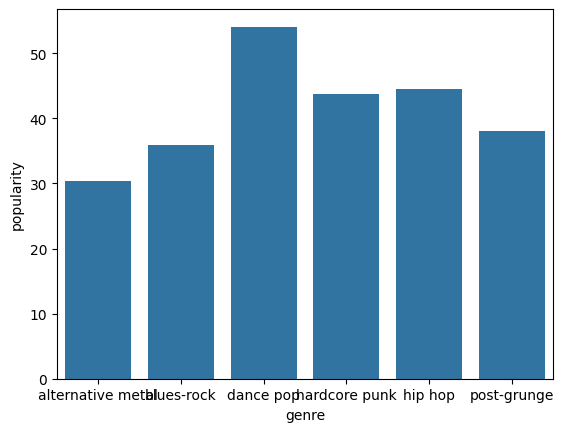

In [ ]:
sns.barplot(x='genre', y='popularity', data = top_genres)

The lineplot displays how song durations have changed over time between 1960 and 2010.

(1960.0, 2010.0)

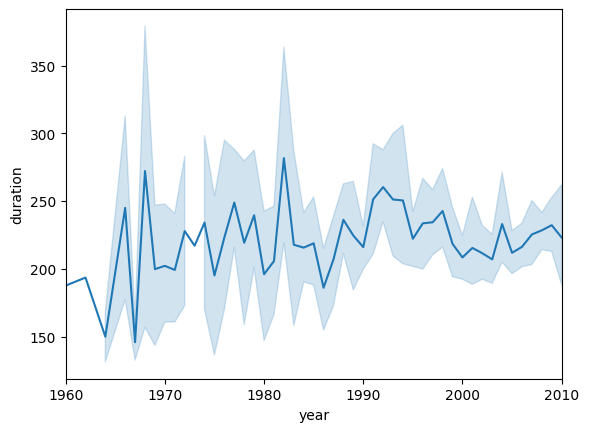

In [ ]:
plot = sns.lineplot(x='year', y='duration', data = songs)
plot.set_xlim(1960, 2010)

The scatterplot displays the relationship between key and time signature for each sampled song.

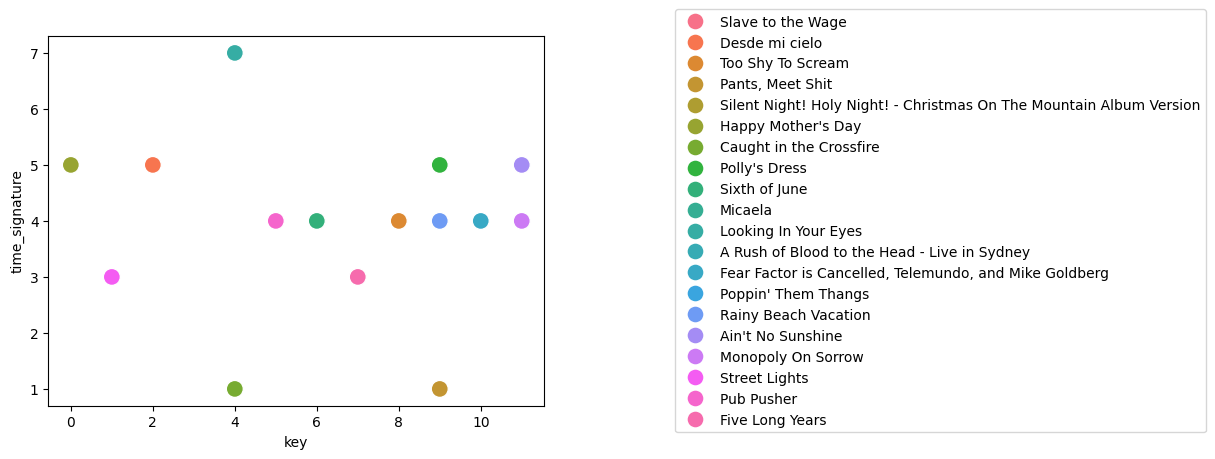

In [ ]:
plot = sns.scatterplot(data = songs.sample(20),
           x = 'key',
           y = 'time_signature',
           hue = 'name',
           s = 150)

plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

The scatterplot displays the relationship between tempo and loudness for each artist.

In [ ]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '.', ',')

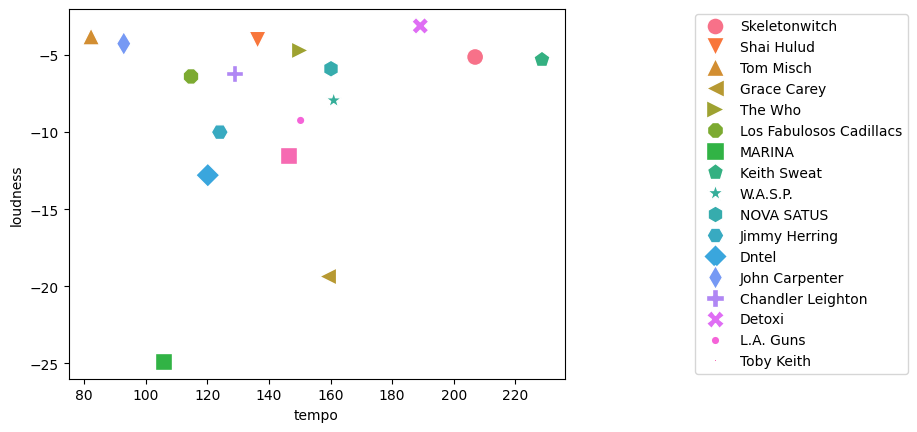

In [ ]:
plot = sns.scatterplot(data = songs.sample(len(filled_markers)),
           x = 'tempo',
           y = 'loudness',
           hue = 'artist',
           style = 'artist',
           markers = filled_markers,
           s = 150)

plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

# Load
Data will be loaded into an SQL relational database on AWS.

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.0 MB/s eta 0:00:00


In [ ]:
import mysql.connector

In [ ]:
# AWS connection information
mysql_address = passwords.address
mysql_username = passwords.username
mysql_password = passwords.password
mysql_database = 'myista322dbs'

# Gets connector and cursor
def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

In [ ]:
# Runs queries
def run_query(query_string):
  conn, cur = get_conn_cur()  # Gets connection and cursor
  cur.execute(query_string)  # Executes string
  my_data = cur.fetchall()  # Fetches query data
  result_df = pd.DataFrame(my_data, columns=cur.column_names)
  cur.close()
  conn.close()
  return result_df

# Gets head of table
def sql_head(table_name):
  conn, cur = get_conn_cur()  # Gets connection and cursor

  # Gets head information
  table_rows_query = """ SELECT * FROM %s LIMIT 5; """ % table_name
  cur.execute(table_rows_query)
  my_data = cur.fetchall() # fetch results

  # Creates a dataframe that combines sql table with column names and returns
  df = pd.DataFrame(my_data, columns=cur.column_names)

  cur.close()
  conn.close()
  return df

In [ ]:
# Query creates song_identifiers table with song_id as a primary key
tq = """CREATE TABLE song_identifiers (
     song_id VARCHAR(255) PRIMARY KEY,
     artist_id VARCHAR(255) NOT NULL,
     name VARCHAR(255) NOT NULL,
     album VARCHAR(255) NOT NULL,
     genre VARCHAR(255) NOT NULL,
     year INTEGER NOT NULL,
     song_hotness FLOAT NOT NULL,
     popularity INTEGER NOT NULL
     );"""

In [ ]:
# Runs query and checks table head
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
sql_head('song_identifiers')

,song_id,artist_id,name,album,genre,year,song_hotness,popularity


In [ ]:
# Shows table data types
conn, cur = get_conn_cur()
cur = conn.cursor()
uq = """ SHOW CREATE TABLE song_identifiers;"""
cur.execute(uq)
cur.fetchall()

[('song_identifiers',
  'CREATE TABLE `song_identifiers` (\n  `song_id` varchar(255) NOT NULL,\n  `artist_id` varchar(255) NOT NULL,\n  `name` varchar(255) NOT NULL,\n  `album` varchar(255) NOT NULL,\n  `genre` varchar(255) NOT NULL,\n  `year` int NOT NULL,\n  `song_hotness` float NOT NULL,\n  `popularity` int NOT NULL,\n  PRIMARY KEY (`song_id`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

In [ ]:
data_tups = [tuple(x) for x in identifiers.to_numpy()]  # Converts rows to tuples

In [ ]:
data_tups[0]  # Checks a tuple

('7EejjSh1WDrm81z0u3Fhmk',
 '4R2ZUCVWjJs5ef9pjnCVC4',
 "I Didn't Mean To Turn You On",
 'Fragile',
 'hip hop',
 0,
 0.60211999,
 43)

In [ ]:
# Query inserts row into table
iq = """INSERT INTO song_identifiers(song_id,artist_id,name,album,genre,year,song_hotness,popularity) VALUES(%s, %s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
# Inserts all rows
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('song_identifiers')

,song_id,artist_id,name,album,genre,year,song_hotness,popularity
0,0089KIV49GhgnHGsyyf9Zq,30sqtiTKIb1oDve0SdYayT,Spaz's House Destruction Party (Live),Mobilize,oi,2001,0.594362,10
1,00Almb97NwRkO1nqjL6dD3,6YmJPuYzqe1HsJArGYcHBJ,EXPIRED,"DON'T WORRY, I'LL BE FINE",illbient,0,0.624746,43
2,00cGNx0otxcMeD4GZHAJtq,3oVcF3VdpMuvMvLLyHPT4t,American Dreaming,Trail Of Flowers,gabba,1988,0.673122,51
3,00RLNHc2jkEjUoCUlFgPVT,0qZyvjwZauLmrobrpJmvib,welcome and goodbye,welcome and goodbye,soft rock,2003,0.549342,82
4,01hLmISIkPrtkDApbakKS5,4md3WmPBO8EdJRbr23hS8W,Stratus (EP Version),00s Rock Discoveries,emo,2004,0.547953,0


This process of creating a table and inserting rows is repeated for the remaining three dataframes.

In [ ]:
# Query creates music_artists table with artist_id as a primary key
tq = """CREATE TABLE music_artists (
     artist_id VARCHAR(255) PRIMARY KEY,
     name VARCHAR(255) NOT NULL,
     artist_hotness FLOAT NOT NULL,
     familiarity FLOAT NOT NULL,
     location VARCHAR(255) NOT NULL
     );"""

In [ ]:
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
sql_head('music_artists')

,artist_id,name,artist_hotness,familiarity,location


In [ ]:
conn, cur = get_conn_cur()
cur = conn.cursor()
uq = """ SHOW CREATE TABLE music_artists;"""
cur.execute(uq)
cur.fetchall()

[('music_artists',
  'CREATE TABLE `music_artists` (\n  `artist_id` varchar(255) NOT NULL,\n  `name` varchar(255) NOT NULL,\n  `artist_hotness` float NOT NULL,\n  `familiarity` float NOT NULL,\n  `location` varchar(255) NOT NULL,\n  PRIMARY KEY (`artist_id`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

In [ ]:
data_tups = [tuple(x) for x in artists.to_numpy()]

In [ ]:
iq = """INSERT INTO music_artists(artist_id,name,artist_hotness,familiarity,location) VALUES(%s, %s, %s, %s, %s);"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('music_artists')

,artist_id,name,artist_hotness,familiarity,location
0,-M-,6soPpJHlCtN6SY8pWlfbC6,0.384902,0.589513,NY - New York City
1,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,0.364819,0.553915,GERMANY
2,2 Chainz,17lzZA2AlOHwCwFALHttmp,0.361510,0.520205,United States
3,2nd II None,1rlHVdoyfG6pQkzcMWI4dr,0.449694,0.651952,Not available
4,2Pac,1ZwdS5xdxEREPySFridCfh,0.449053,0.703348,Not available


In [ ]:
# Query creates song_elements table with song_id as a primary key
tq = """CREATE TABLE song_elements (
     song_id VARCHAR(255) PRIMARY KEY,
     song_key INTEGER NOT NULL,
     loudness FLOAT NOT NULL,
     mode INTEGER NOT NULL,
     tempo FLOAT NOT NULL,
     time_signature INTEGER NOT NULL,
     explicit BOOLEAN NOT NULL
     );"""

In [ ]:
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
sql_head('song_elements')

,song_id,song_key,loudness,mode,tempo,time_signature,explicit


In [ ]:
conn, cur = get_conn_cur()
cur = conn.cursor()
uq = """ SHOW CREATE TABLE song_elements;"""
cur.execute(uq)
cur.fetchall()

[('song_elements',
  'CREATE TABLE `song_elements` (\n  `song_id` varchar(255) NOT NULL,\n  `song_key` int NOT NULL,\n  `loudness` float NOT NULL,\n  `mode` int NOT NULL,\n  `tempo` float NOT NULL,\n  `time_signature` int NOT NULL,\n  `explicit` tinyint(1) NOT NULL,\n  PRIMARY KEY (`song_id`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

In [ ]:
data_tups = [tuple(x) for x in elements.to_numpy()]

In [ ]:
iq = """INSERT INTO song_elements(song_id,song_key,loudness,mode,tempo,time_signature,explicit) VALUES(%s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('song_elements')

,song_id,song_key,loudness,mode,tempo,time_signature,explicit
0,0089KIV49GhgnHGsyyf9Zq,1,-6.547,1,131.121,4,0
1,00Almb97NwRkO1nqjL6dD3,6,-10.258,1,86.155,4,0
2,00cGNx0otxcMeD4GZHAJtq,11,-14.109,0,124.670,4,0
3,00RLNHc2jkEjUoCUlFgPVT,0,-8.238,1,123.943,4,0
4,01hLmISIkPrtkDApbakKS5,8,-5.026,1,92.222,3,0


In [ ]:
# Query creates song_measures table with song_id as a primary key
tq = """CREATE TABLE song_measures (
     song_id VARCHAR(255) PRIMARY KEY,
     duration FLOAT NOT NULL,
     beats_start FLOAT NOT NULL,
     fade_in FLOAT NOT NULL,
     fade_out FLOAT NOT NULL,
     tatums_start FLOAT NOT NULL
     );"""

In [ ]:
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
sql_head('song_measures')

,song_id,duration,beats_start,fade_in,fade_out,tatums_start


In [ ]:
conn, cur = get_conn_cur()
cur = conn.cursor()
uq = """ SHOW CREATE TABLE song_measures;"""
cur.execute(uq)
cur.fetchall()

[('song_measures',
  'CREATE TABLE `song_measures` (\n  `song_id` varchar(255) NOT NULL,\n  `duration` float NOT NULL,\n  `beats_start` float NOT NULL,\n  `fade_in` float NOT NULL,\n  `fade_out` float NOT NULL,\n  `tatums_start` float NOT NULL,\n  PRIMARY KEY (`song_id`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

In [ ]:
data_tups = [tuple(x) for x in measures.to_numpy()]

In [ ]:
iq = """INSERT INTO song_measures(song_id,duration,beats_start,fade_in,fade_out,tatums_start) VALUES(%s, %s, %s, %s, %s, %s);"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('song_measures')

,song_id,duration,beats_start,fade_in,fade_out,tatums_start
0,0089KIV49GhgnHGsyyf9Zq,190.293,0.25028,0.189,175.676,0.25028
1,00Almb97NwRkO1nqjL6dD3,157.535,0.63875,0.000,450.694,0.28776
2,00cGNx0otxcMeD4GZHAJtq,257.297,0.50541,0.462,239.009,0.26438
3,00RLNHc2jkEjUoCUlFgPVT,140.643,0.49141,0.200,209.572,0.24835
4,01hLmISIkPrtkDApbakKS5,254.440,0.04027,2.775,235.717,0.04027


In [ ]:
# Query creates music_genres table with genre as a primary key
tq = """CREATE TABLE music_genres (
     genre VARCHAR(255) PRIMARY KEY,
     song_count INTEGER NOT NULL,
     artist_count INTEGER NOT NULL,
     popularity FLOAT NOT NULL,
     mean_duration FLOAT NOT NULL,
     mean_loudness FLOAT NOT NULL,
     mean_tempo FLOAT NOT NULL
     );"""

In [ ]:
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
sql_head('music_genres')

,genre,song_count,artist_count,popularity,mean_duration,mean_loudness,mean_tempo


In [ ]:
conn, cur = get_conn_cur()
cur = conn.cursor()
uq = """ SHOW CREATE TABLE music_genres;"""
cur.execute(uq)
cur.fetchall()

[('music_genres',
  'CREATE TABLE `music_genres` (\n  `genre` varchar(255) NOT NULL,\n  `song_count` int NOT NULL,\n  `artist_count` int NOT NULL,\n  `popularity` float NOT NULL,\n  `mean_duration` float NOT NULL,\n  `mean_loudness` float NOT NULL,\n  `mean_tempo` float NOT NULL,\n  PRIMARY KEY (`genre`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

In [ ]:
data_tups = [tuple(x) for x in genres.to_numpy()]

In [ ]:
iq = """INSERT INTO music_genres(genre,song_count,artist_count,popularity,mean_duration,mean_loudness,mean_tempo) VALUES(%s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('music_genres')

,genre,song_count,artist_count,popularity,mean_duration,mean_loudness,mean_tempo
0,acid jazz,1,1,7.0,205.920,-13.5220,61.587
1,afrobeat,1,1,4.0,273.080,-9.7840,109.804
2,all-female,2,2,34.0,342.387,-11.3500,119.201
3,alternative country,2,2,74.5,184.139,-11.5815,102.796
4,alternative dance,10,10,41.8,233.613,-7.3262,118.473


In [ ]:
run_query("SHOW TABLES")

,Tables_in_myista322dbs
0,casedb_case
1,casedb_casetype
2,casedb_category
3,casedb_judge
4,casedb_rollup
5,coviddb_states
6,coviddb_weekly_stats
7,music_artists
8,music_genres
9,song_elements


All five tables have been pushed to the SQL database! All the remaining tables shown in the database are from past ISTA 322 assignments.

# Queries

In [ ]:
# Test query to look at the first five rows of song_identifiers
sq = """SELECT * FROM song_identifiers
     LIMIT 5;"""
run_query(sq)

,song_id,artist_id,name,album,genre,year,song_hotness,popularity
0,0089KIV49GhgnHGsyyf9Zq,30,Spaz's House Destruction Party (Live),Mobilize,oi,2001,0.594362,10
1,00Almb97NwRkO1nqjL6dD3,6,EXPIRED,"DON'T WORRY, I'LL BE FINE",illbient,0,0.624746,43
2,00cGNx0otxcMeD4GZHAJtq,3,American Dreaming,Trail Of Flowers,gabba,1988,0.673122,51
3,00RLNHc2jkEjUoCUlFgPVT,0,welcome and goodbye,welcome and goodbye,soft rock,2003,0.549342,82
4,01hLmISIkPrtkDApbakKS5,4,Stratus (EP Version),00s Rock Discoveries,emo,2004,0.547953,0


In [ ]:
# Test query to get identifying information of all explicit songs
sq = """SELECT * FROM song_identifiers
     WHERE song_id IN (
         SELECT song_id FROM song_elements
         WHERE explicit = TRUE
     );
     """
run_query(sq)

,song_id,artist_id,name,album,genre,year,song_hotness,popularity
0,0301nLjG0ti26rx5ZmfqtP,9,"Scenario (feat. Busta Rhymes, Dinco D & Charli...",The Low End Theory,jazz rap,1991,0.704099,56
1,06q3sUgkq2k7uhdsi1fczX,7,You're a Fucking Bitch Hope You Know That Shit,Low Expectations,heavy metal,2006,0.606816,66
2,08l9WKDuRyGeStQ9ojTlFh,0,Meet Me in the Bathroom,Room On Fire,indie rock,2003,0.745743,50
3,093MlZS93ZKlHpGkmb3k3W,4,BROTHER STONE (FEAT. KODAK BLACK),HARDSTONE PSYCHO,grunge,1992,0.708746,70
4,0DiSFnjF8Szv3if2RzOXw4,0,Why You Wanna Get Funky...,Future Development,hip hop,1998,0.636287,16
...,...,...,...,...,...,...,...,...
196,7rNwCrWh4mUl6XA2nxjV0T,22,Freaxxx,BC 13,pop rap,2008,0.682113,37
197,7tjLhVohcthjLc72nXrWT2,395,you're my world,you're my world,europop,0,0.569276,40
198,7uqcLJFlSYjVPLUz1vPxkY,15,Guardian angel,SKINS,hardcore metal,2007,0.531722,62
199,7xQAfvXzm3AkraOtGPWIZg,246,Wow.,Hollywood's Bleeding,indie rock,2003,0.771474,76


In [ ]:
# Test query to get the average popularity of songs in the minor mode
sq = """SELECT AVG(popularity) AS average_popularity FROM song_identifiers
     WHERE song_id IN (
         SELECT song_id FROM song_elements
         WHERE mode = 0
     );
     """
run_query(sq)

,average_popularity
0,40.6427


In [ ]:
# Test query to get the number of songs released in 2005 that are longer than 5 minutes
sq = """SELECT COUNT(song_id) AS song_count FROM song_identifiers
     WHERE song_id IN (
         SELECT song_id FROM song_measures
         WHERE duration > 300
     ) AND year = 2005;
     """
run_query(sq)

,song_count
0,6


In [ ]:
# Test query to get the average fade_in and fade_out times for each year
sq = """SELECT year, AVG(fade_in) AS average_fade_in, AVG(fade_out) AS average_fade_out FROM song_identifiers
     JOIN song_measures ON song_identifiers.song_id = song_measures.song_id
     GROUP BY year
     ORDER BY year DESC;"""
run_query(sq)

,year,average_fade_in,average_fade_out
0,2010,0.400310,228.715758
1,2009,0.678306,237.509611
2,2008,1.088458,232.180615
3,2007,0.923650,223.219126
4,2006,0.758575,243.408787
5,2005,0.603750,229.627216
6,2004,0.467311,219.777784
7,2003,0.569705,225.356987
8,2002,0.556383,213.580234
9,2001,0.534518,223.805053


# Data Sources

Million Song Subset:

*   https://github.com/Vatshayan/Music-Songs-Genre-Dataset?tab=readme-ov-file
*   https://raw.githubusercontent.com/Vatshayan/Music-Songs-Genre-Dataset/refs/heads/master/music.csv
*   https://docs.google.com/spreadsheets/d/1Hsy-HNgQfQUEbQOTnK9s1WcBILg39QTW2DEPWqoOuIM/edit?gid=1326504834#gid=1326504834
*   http://millionsongdataset.com/pages/getting-dataset/#subset

Spotify:
https://developer.spotify.com/
